In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import os
print(os.listdir("./data"))
from plotly.offline import init_notebook_mode, iplot, plot
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.io as pio

import numpy as np 
import pandas as pd 

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

import os
print(os.listdir("./data"))

import warnings
warnings.filterwarnings("ignore")
from IPython.display import IFrame
import folium 
from folium import plugins
import ipywidgets
import geopy 
import numpy as np
import pandas as pd
from vega_datasets import data as vds 
import geocoder


['20220202_PRPC-fuel_Q4-2021_FINAL.xlsx', 'CO2emisions.xlsx', 'CountrybyFuel.xlsx', 'electric_carsMODELS.csv', 'EuropebyFuel.xlsx', 'matriculados_esp.csv', 'Models.xlsx', 'Pics', 'SalesbyCountry.xlsx', 'WorldwideSalesbyCountry.xlsx']


['20220202_PRPC-fuel_Q4-2021_FINAL.xlsx', 'CO2emisions.xlsx', 'CountrybyFuel.xlsx', 'electric_carsMODELS.csv', 'EuropebyFuel.xlsx', 'matriculados_esp.csv', 'Models.xlsx', 'Pics', 'SalesbyCountry.xlsx', 'WorldwideSalesbyCountry.xlsx']


In [2]:
EUbyFuel = pd.read_excel('data\EuropebyFuel.xlsx')    #Ventas en Europa de coches por tipo de combustible
EUbyFuel.head()

,Model,2021,2020
0,Petrol,4756897,5760122
1,Diesel,2078022,3104226
2,HEV,2409495,1520086
3,BEV,1218360,745644
4,PHEV,1045022,620248


In [47]:
"""
Sumatorio de modelos diesel gasolina y loe electricos para sacar las funciones de tendencia de cada uno de ellos y poder ver donde interseccionan.
"""
serie1 = EUbyFuel.iloc[0] + EUbyFuel.iloc[1]
print (pd.DataFrame(serie1))

serie2 = EUbyFuel.iloc[2] + EUbyFuel.iloc[3] + EUbyFuel.iloc[4]
print (pd.DataFrame(serie2))


                      0
Model      PetrolDiesel
2021            6834919
2020            8864348
Variacion        -50.48
                    0
Model      HEVBEVPHEV
2021          4672877
2020          2885978
Variacion      190.39


In [48]:
"""
Definimos las variables para obtener las funciones de tendencia 
"""

b1 = serie1.iloc[2] #Ventas gasolina-diesel 2020
b2 = serie1.iloc[1] #Ventas gasolina-diesel 2021
d1 = serie2.iloc[2] #Ventas electricos 2020
d2 = serie2.iloc[1] #Ventas electricos 2021

a1 = 2020 #Valores de y que vamos a introducir en las formulas.
a2 = 2021
c1 = 2020
c2 = 2021

m = (b2-b1)/(a2-a1)
n = m*(-a1)+ b1

t = (d2-d1)/(c2-c1)
u = t*(-c1)+d1

In [53]:
x = (u-n)/(m-t)  #resultado de igualar la funcion de los electricos con los gasolina/diesel para ver en que punto interseccionan
x+1

2022.5665241562047

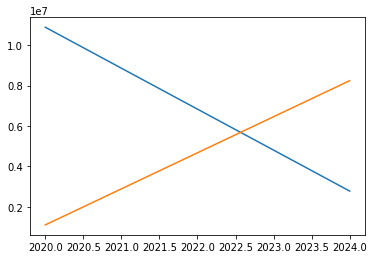

In [56]:
#funcion que nos va a pintar las gráficas para ver donde se cruzan
x = range(2020, 2025)

def f1(x):
    return m*(x-1) + n   # restamos uno en la formula porq queremos que sea el valor del año anterior. los datos de ventas de 2021 nos los dan realmente en 2020

def f2(x):
    return t*(x-1) + u


x = range(2020, 2025)


plt.plot(x, [f1(i) for i in x])
plt.plot(x, [f2(i) for i in x])



In [9]:
EUbyFuel['Variacion'] = (((EUbyFuel[2021]-EUbyFuel[2020])/EUbyFuel[2020])*100).round(2)
EUbyFuel

,Model,2021,2020,Variacion
0,Petrol,4756897,5760122,-17.42
1,Diesel,2078022,3104226,-33.06
2,HEV,2409495,1520086,58.51
3,BEV,1218360,745644,63.40
4,PHEV,1045022,620248,68.48


In [37]:
"""
Grafica que muestra las variaciones de 2020 a 2021 en ventas por cada tipo.
"""
trace1 = go.Bar(x = EUbyFuel['Model'],
               y = EUbyFuel['Variacion'],
               text = EUbyFuel[2020],
               name = '2020', 
                marker = dict(color = '#2471A3',
                            line = dict(color = '#FFFFFF', width = 1)))


data = [trace1]   
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout=layout) 


fig.update_layout(xaxis_title="2021 vs 2020 variación en las ventas",
    legend=dict(
    orientation = 'h',
    yanchor="top",
    y=1,
    x=0.43))

iplot(fig)

<Figure size 504x360 with 0 Axes>

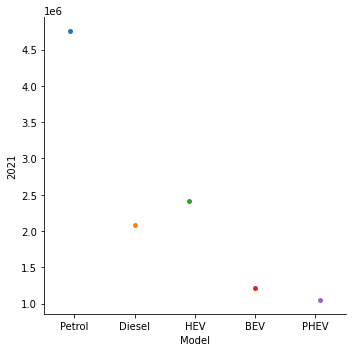

In [11]:
plt.figure(figsize=(7,5))
sns.catplot(x='Model', y=2021, data=EUbyFuel)

#No es visual, mejor utilizar un barplot.

In [36]:
"""
Gráfico para comparar la venta de vehiculos según su tipo de combustión respecto al año 2020
"""

trace1 = go.Bar(x = EUbyFuel['Model'],
               y = EUbyFuel[2020],
               text = EUbyFuel[2020],
               name = '2020', 
                marker = dict(color = '#2471A3',
                            line = dict(color = '#FFFFFF', width = 1)))

trace2 = go.Bar(x = EUbyFuel['Model'],
               y = EUbyFuel[2021],
               text = EUbyFuel[2021],
               name = '2021',           
               marker = dict(color = '#AED6F1',
                            line = dict(color = '#FFFFFF', width = 1)))

data = [trace1, trace2]   
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout=layout) 


fig.update_layout(xaxis_title="2021 vs 2020 fuel's type in Europe",
    legend=dict(
    orientation = 'h',
    yanchor="top",
    y=1,
    x=0.43))

iplot(fig)

'''
Vemos como los carburanets tradicionales tienden a disminuir, mientras que los modelos electricos tienden a aumentar pese a la disminucion de las ventas de vehiculos.
'''

'\nVemos como los carburanets tradicionales tienden a disminuir, mientras que los modelos electricos tienden a aumentar pese a la disminucion de las ventas de vehiculos.\n'

In [13]:
EUbyFuel2021 = EUbyFuel.set_index('Model')
EUbyFuel2021 = EUbyFuel2021[EUbyFuel2021.index.isin(['HEV', 'PHEV', 'BEV'])]
EUbyFuel2021

,2021,2020,Variacion
Model,,,
HEV,2409495,1520086,58.51
BEV,1218360,745644,63.40
PHEV,1045022,620248,68.48


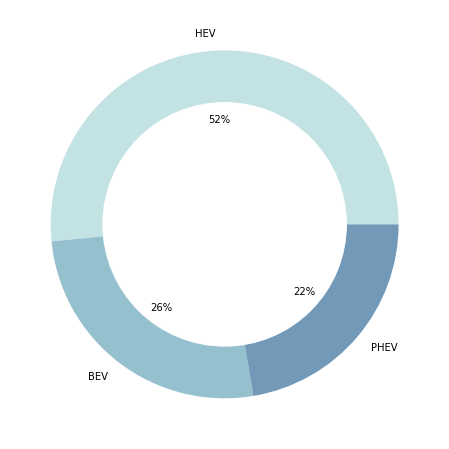

In [14]:
"""
Porcentaje de modelos electricos vendidos, vemos que lso HEV son los mas vendidos con diferencia, lo que refuta una de las hipotesis.
"""

data = EUbyFuel2021[2021]

my_circle=plt.Circle((0,0),
                     0.7, 
                     color= 'white')

plt.figure(figsize=(8,8))
colors = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=False)
plt.pie(data,
        labels=data.index,
        autopct='%0.0f%%', colors = colors)

p=plt.gcf()
p.gca().add_artist(my_circle);
                    

In [15]:
EUbyFuel2021_2 = EUbyFuel.set_index('Model')

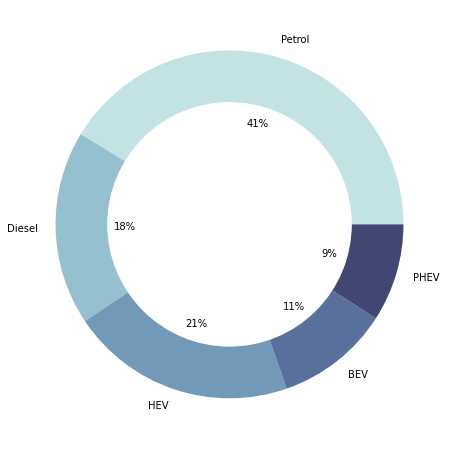

In [16]:
"""
Porcentaje de todos los tipos de combustion vendidos. Gasolina sigue siendo el mas vendido.
"""

data = EUbyFuel2021_2[2021]

my_circle=plt.Circle((0,0),
                     0.7, 
                     color= 'white')

plt.figure(figsize=(8,8))
colors = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=False)
plt.pie(data,
        labels=data.index,
        autopct='%0.0f%%', colors = colors)

p=plt.gcf()
p.gca().add_artist(my_circle);
                    

In [17]:
matriculaciones_ESP = pd.read_csv('data\matriculados_esp.csv')
matriculaciones_ESP = matriculaciones_ESP.dropna()
matriculaciones_ESP.head()
matriculaciones_ESP.groupby('Año').sum()
#no se utiliza finalmente

,"Híbridos, eléctricos y otros",Gasolina,Diésel
Año,,,
2017,25.617,187.643,176.796
2018,112.357,739.531,473.478
2019,151.342,756.190,350.823
2020,656.258,423.543,235.952
2021,300.367,387.901,171.227
2022,43.625,42.691,18.164


In [18]:
WorldwideSalesbyCountry = pd.read_excel('data\WorldwideSalesbyCountry.xlsx', index_col='Region')
WorldwideSalesbyCountry

,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,,,
Europa,12308200,13006500,14201900,15131700,15631700,15624500,15805800,11961200,11774900
Rusia,2777400,2491400,1601200,1425800,1595700,1800600,1759500,1598800,1666800
EEUU,15531600,16435300,17386300,17465000,17134700,17215200,16965200,14450800,14913700
Japon,4562300,4699600,4215900,4146500,4386400,4391200,4301100,3810000,3675700
Brasil,3579900,3333400,2480500,1988600,2176000,2475400,2665600,1954800,1977100
India,2554000,2570500,2772700,2966600,3229100,3394700,2962100,2435100,3082400
China,16303700,18368900,20047200,23693400,24171400,23256300,21045000,19790000,21090200


In [19]:
Europe = WorldwideSalesbyCountry.iloc[0]
Russia = WorldwideSalesbyCountry.iloc[1]
USA = WorldwideSalesbyCountry.iloc[2]
Japan = WorldwideSalesbyCountry.iloc[3]
Brazil = WorldwideSalesbyCountry.iloc[4]
India = WorldwideSalesbyCountry.iloc[5]
China = WorldwideSalesbyCountry.iloc[6]

pio.templates[pio.templates.default].layout.colorway = ['#117A65', '#A83345','#F1C40F','#1F618D', '#A83345','#F1C40F']

Europe = {'x' : Europe.index,
           'y' : Europe.values,
           'name': 'Europe',
           'type': 'bar'};
Russia = {'x' : Russia.index,
           'y' : Russia.values,
           'name': 'Russia',
           'type': 'bar'};
USA = {'x' : USA.index,
           'y' : USA.values,
           'name': 'USA',
           'type': 'bar'};
India = {'x' : India.index,
           'y' : India.values,
           'name': 'India',
           'type': 'bar'};
Brazil = {'x' : Brazil.index,
           'y' : Brazil.values,
           'name': 'Brazil',
           'type': 'bar'};
China = {'x' : China.index,
           'y' : China.values,
           'name': 'China',
           'type': 'bar'};

data = [China, USA, Europe, Brazil, India, Russia]
layout = dict(title = 'Sales for region', barmode = 'group')

fig = go.Figure(data = data,layout = layout)

#iplot(fig);

'Grafico de barras descartado'

'Grafico de barras descartado'

In [20]:
Europe = WorldwideSalesbyCountry.iloc[0]
Russia = WorldwideSalesbyCountry.iloc[1]
USA = WorldwideSalesbyCountry.iloc[2]
Japan = WorldwideSalesbyCountry.iloc[3]
Brazil = WorldwideSalesbyCountry.iloc[4]
India = WorldwideSalesbyCountry.iloc[5]
China = WorldwideSalesbyCountry.iloc[6]
#Convined = WorldwideSalesbyCountry.iloc[7]

pio.templates[pio.templates.default].layout.colorway = ['#117A65', '#A83345','#F1C40F','#1F618D', '#A83345','#F1C40F']


Europe = go.Scatter(x = Europe.index,
           y = Europe.values,
           name='Europe',
           )

Russia = go.Scatter(x = Russia.index,
           y = Russia.values,
           name='Russia',
           )

USA = go.Scatter(x = USA.index,
           y = USA.values,
           name='USA',
           )
Brazil = go.Scatter(x = Brazil.index,
           y = Brazil.values,
           name='Brazil',
           )
India = go.Scatter(x = India.index,
           y = India.values,
           name='India',
           )
China = go.Scatter(x = China.index,
           y = China.values,
           name='China',
           )

#Convined = {'x' : Convined.index,
           #'y' : Convined.values,
           #'name': 'Total',
           #'type': 'bar',
           #'base' : 'g'};

data = [China, USA, Europe, Brazil, India, Russia]


fig = go.Figure(data=data, layout=layout)

iplot(fig)



In [21]:
CountrybyFuel = pd.read_excel('data\CountrybyFuel.xlsx', index_col= 'Country')
print(CountrybyFuel.head())

'Dataset utilizado para la generacion de los mapas en Tableau'

         Fuel   2021   2020         Lon      Lat
Country                                         
Austria   BEV  33380  15986  13.3333000  47.3333
Belgium   BEV  22677  14994   4.0000000  50.8333
Bulgaria  BEV    321    139  25.0000000  43.0000
Croatia   BEV   1475    533  15.5000000  45.1667
Cyprus    BEV     82     42  33.0000000  35.0000


'Dataset utilizado para la generacion de los mapas en Tableau'

In [22]:
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
#map_country = folium.Map(location=[8, 45], zoom_start=3)

# plot airport locations
#for (index, row) in CountrybyFuel.iterrows():
    #folium.Marker(location = [row.loc['Lat'], row.loc['Lon']],
                 #tooltip = row.loc['Country'] + ' ' + str(row[2021]),
                 #icon=folium.Icon(color='green', icon='car', prefix='fa')).add_to(map_country)

    
# display map    
#map_country

In [23]:
"""
Agrupación por por pais, sumando todos los tipos de combustible.
"""
CountrybyFuel = CountrybyFuel.groupby('Country').sum()[[2021]]
CountrybyFuel

,2021
Country,
Austria,239717
Belgium,380036
Bulgaria,4086
Bulgaria1,20786
Croatia,43926
Cyprus,10622
Czech Republic,203761
Denmark,185360
Estonia,21870


In [24]:
spain = geocoder.osm('Spain, Madrid')
germany = geocoder.osm('Berlin, Germany')

map_country = folium.Map(location=[8, 45], zoom_start=3)
germany_ = [spain.lat, spain.lng, 830000]
spain_ = [germany.lat, germany.lng, 2600000]

large_cities = [spain_, germany_]

map_heatmap = folium.Map([8, 45], tiles='CartoDB Positron', zoom_start=3)
plugins.HeatMap(large_cities).add_to(map_heatmap)

map_heatmap

#Prueba descartada, este mapa se hará finalmente en tableau

In [25]:
Models = pd.read_excel('data\Models.xlsx', index_col= 'Models')

In [26]:
Tesla = Models.iloc[0]
Renault = Models.iloc[1]
Volkswagen  = Models.iloc[2]

pio.templates[pio.templates.default].layout.colorway = ['#117A65','#099268', '#12b886']

Tesla = {'x' : Tesla.index,
           'y' : Tesla.values,
           'name': 'Tesla',
           'type': 'bar'};
Renault = {'x' : Renault.index,
           'y' : Renault.values,
           'name': 'Renault',
           'type': 'bar'};
Volkswagen = {'x' : Volkswagen.index,
           'y' : Volkswagen.values,
           'name': 'Volkswagen',
           'type': 'bar'};

data = [Tesla,Renault,Volkswagen]

layout = dict(title = 'Top selling models')

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
#Descartado

In [27]:
trace1 = go.Bar(x = Models.index,
                y = Models['Sales'],
                marker = dict(color = '#2471A3'))

data = [trace1] 

fig = go.Figure(data = data) 

fig.update_layout(xaxis_title="TOP SELLING MODELS")

iplot(fig)

In [28]:
CO2_T = pd.read_excel('data\CO2emisions.xlsx',sheet_name = 'CO2_T')

In [29]:
""""
Eliminamos la columna de porcentajes que no nos sirve para la tabla de correlaciones.
"""
CO2_1 = CO2_T.drop(['porcentajeElc'], axis=1)

In [30]:
CO2_1.corr()

,CO2,Electric,NonElectric,TotSales
CO2,1.000000,0.010461,0.112801,0.071238
Electric,0.010461,1.000000,0.970031,0.989560
NonElectric,0.112801,0.970031,1.000000,0.994922
TotSales,0.071238,0.989560,0.994922,1.000000


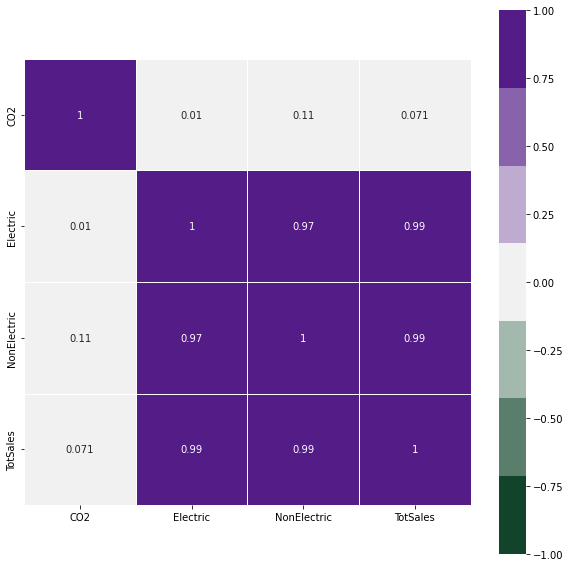

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(CO2_1.corr(),
            vmin=-1,
            vmax=1,
            annot = True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

#No tiene sentido este tipo de gráfica de correlacion

In [32]:
CO2_2 = CO2_T[['Pais','CO2', 'Electric']]
CO2_2['Objetivo'] = CO2_2['CO2'].mean()
CO2_2 = CO2_2.sort_values('CO2', ascending = False)
CO2_2.head()

,Pais,CO2,Electric,Objetivo
3,Bulgaria,133.0,1054,104.15588
18,Polonia,125.0,138609,104.15588
4,Chipre,125.0,2655,104.15588
8,Estonia,121.0,7044,104.15588
21,República Checa,120.9,32018,104.15588


In [33]:
""""
Índice de calidad del aire mundial
"""

trace1 = go.Bar(x = CO2_2['Pais'],
                y = CO2_2['CO2'],
                name = "CO2",
                marker = dict(color = '#2471A3'))

trace2 = go.Scatter(x = CO2_2['Pais'],
                y = CO2_2['Objetivo'],
                name = "Media Europa",
                marker = dict(color = '#ff0000'))

data = [trace1, trace2] 

fig = go.Figure(data = data) 

fig.update_layout(xaxis_title="Emisiones de CO2")

iplot(fig)

In [34]:
CO2_2 = CO2_T.sort_values('porcentajeElc', ascending = False)

In [35]:
trace1 = go.Bar(x = CO2_2['Pais'],
                y = CO2_2['porcentajeElc'],
                marker = dict(color = '#2471A3'))

data = [trace1]

fig = go.Figure(data = data) 

fig.update_layout(xaxis_title="")

iplot(fig)